In [17]:
# Install necessary packages
import subprocess
import sys

In [18]:
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [19]:

packages = ["pandas", "numpy", "matplotlib", "seaborn", "scikit-learn", "scipy"]
for package in packages:
    install(package)


In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [21]:
# Load the survey data
survey_df = pd.read_csv('C:\\Users\\SPURGE\\Desktop\\SCMA\\A4\\Survey.csv')
sur_int = survey_df.iloc[:, 19:46]

In [22]:
# Standardize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [23]:
# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(sur_int_scaled)
    sse.append(kmeans.inertia_)

C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

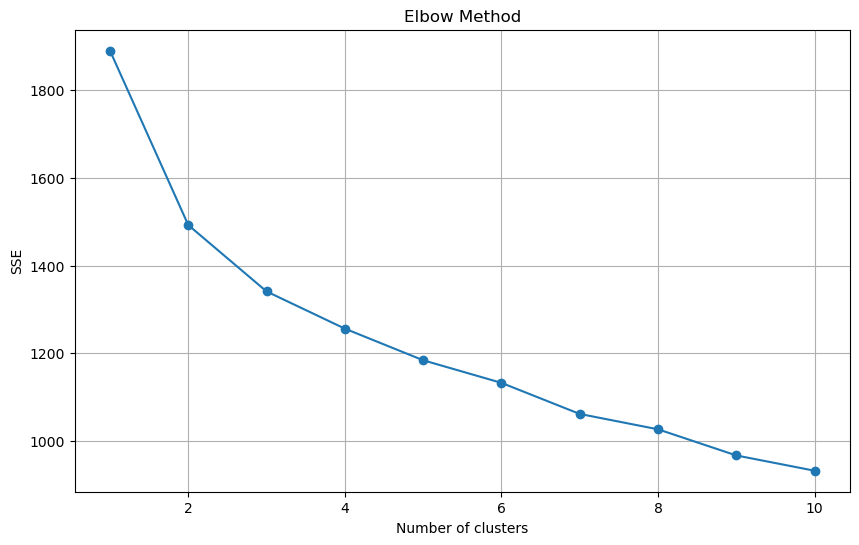

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [25]:
# Silhouette Method to determine the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(sur_int_scaled)
    score = silhouette_score(sur_int_scaled, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

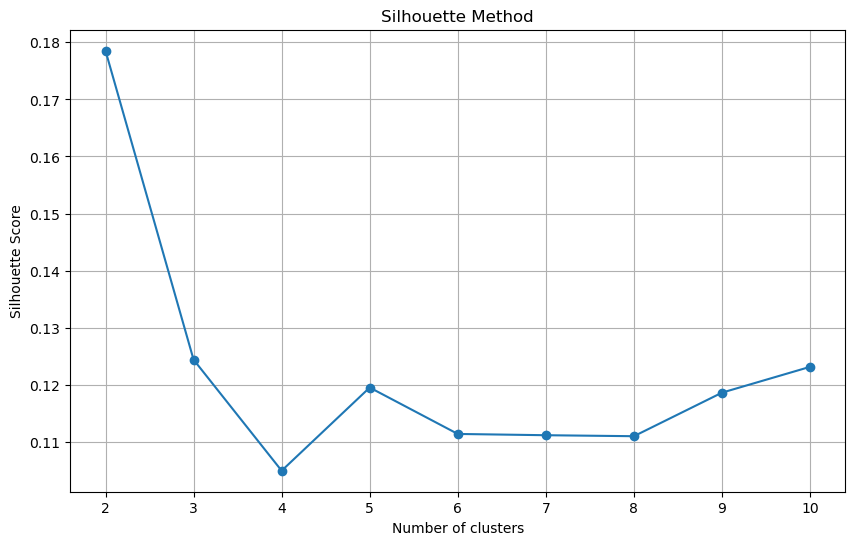

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [27]:
# Based on the elbow and silhouette methods, let's assume the optimal number of clusters is 4
n_clusters = 4

In [28]:
# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=25)
kmeans.fit(sur_int_scaled)
labels = kmeans.labels_

C:\Users\SPURGE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


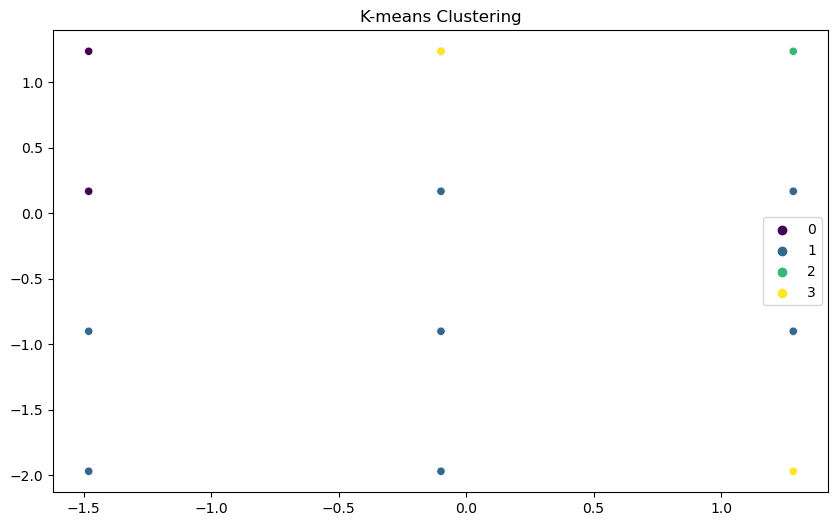

In [29]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sur_int_scaled[:, 0], y=sur_int_scaled[:, 1], hue=labels, palette='viridis')
plt.title('K-means Clustering')
plt.show()

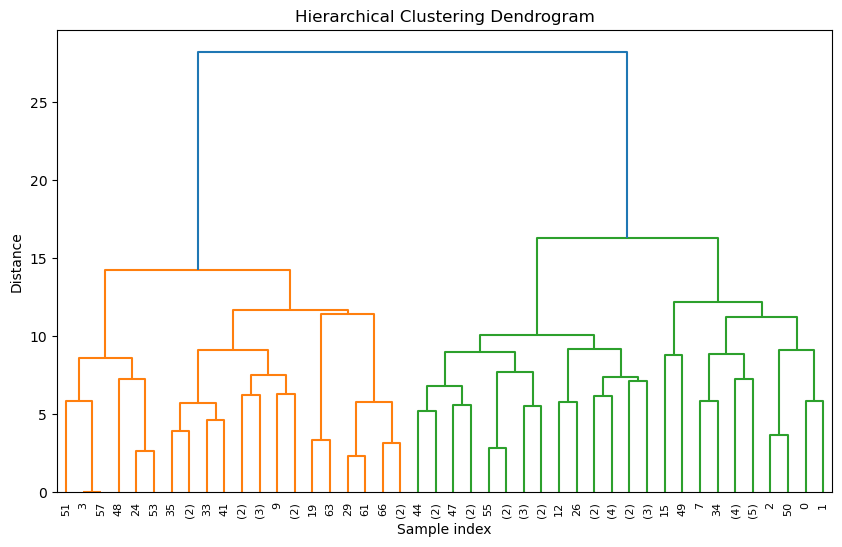

In [30]:
# Hierarchical clustering
Z = linkage(sur_int_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=0.7*np.max(Z[:, 2]), show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [31]:
# Cut the dendrogram to form clusters
cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

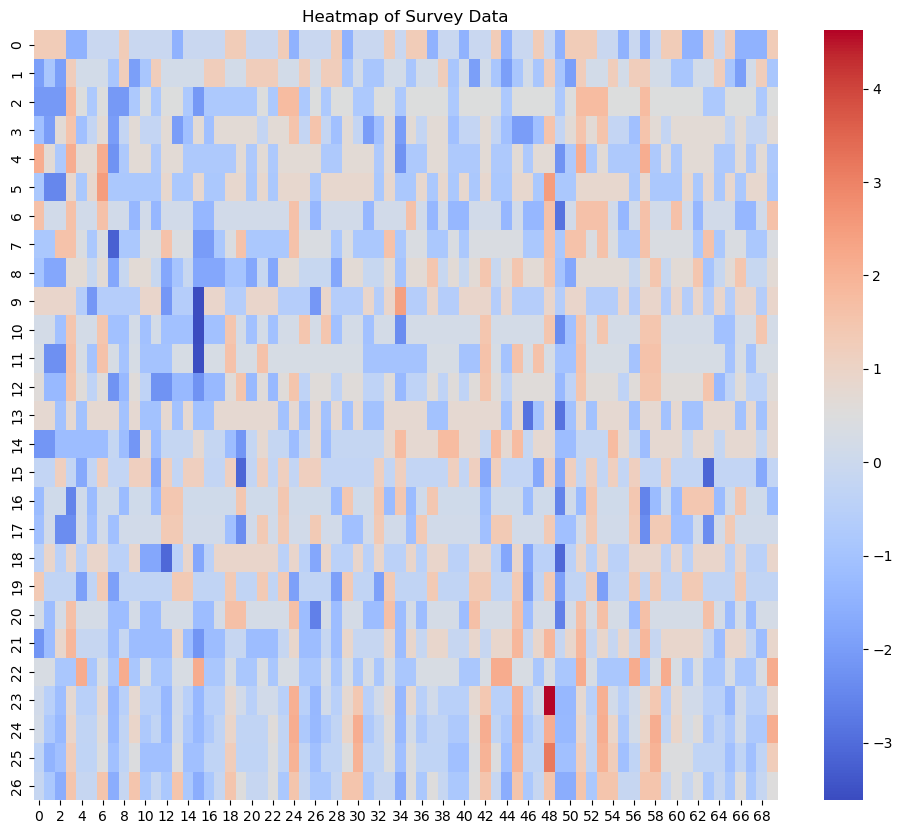

In [32]:
# Create a heatmap to visualize the clusters
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(sur_int_scaled).T, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Survey Data')
plt.show()

In [33]:
# Characterizing the respondents based on their background variables
background_vars = survey_df.iloc[:, :19]  # Assuming first 19 columns are background variables
background_vars['Cluster'] = labels


In [35]:
# Separate numeric and non-numeric columns
numeric_cols = background_vars.select_dtypes(include=np.number).columns
non_numeric_cols = background_vars.select_dtypes(exclude=np.number).columns

In [36]:
# Calculate mean for numeric columns and mode for non-numeric columns
numeric_summary = background_vars.groupby('Cluster')[numeric_cols].mean()
non_numeric_summary = background_vars.groupby('Cluster')[non_numeric_cols].agg(lambda x: x.mode().iloc[0])


In [37]:
# Combine the summaries
cluster_characteristics = pd.concat([numeric_summary, non_numeric_summary], axis=1)
print(cluster_characteristics)

                Income  1.Proximity to city  2.Proximity to schools  Cluster  \
Cluster                                                                        
0         64600.000000             3.560000                3.360000      0.0   
1        142368.421053             4.000000                3.263158      1.0   
2        200000.000000             4.000000                4.625000      2.0   
3         56111.111111             3.166667                3.222222      3.0   

              City Sex    Age      Occupation Monthly Household Income  \
Cluster                                                                  
0            Delhi   F  26-35  Private Sector         45,001 to 65,000   
1           Mumbai   M  46-60  Private Sector                  >125000   
2           Mumbai   F  36-45   Self Employed                  >125000   
3        Bangalore   M  36-45  Private Sector         25,001 to 45,000   

        Planning to Buy a new house Time Frame Reasons for buying a house 